In [1]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
from sklearn.cluster import KMeans

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/SabinaVino/NewRepository/SabinaVino-patch-1/ML%20%D0%BD%D0%B0%20%D0%BF%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BA%D1%83/beverage_r.csv',sep=';',decimal=',')

In [4]:
hr=pd.read_csv('https://raw.githubusercontent.com/SabinaVino/NewRepository/SabinaVino-patch-1/ML%20%D0%BD%D0%B0%20%D0%BF%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BA%D1%83/assess.dat', sep='\s+\|\s+')
hr.to_csv('assess.csv',index=None)

<ipython-input-4-9d41e498db3a>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  hr=pd.read_csv('https://raw.githubusercontent.com/SabinaVino/NewRepository/SabinaVino-patch-1/ML%20%D0%BD%D0%B0%20%D0%BF%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BA%D1%83/assess.dat', sep='\s+\|\s+')


In [5]:
hr=pd.read_csv('https://raw.githubusercontent.com/SabinaVino/NewRepository/SabinaVino-patch-1/ML%20%D0%BD%D0%B0%20%D0%BF%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BA%D1%83/assess.dat', sep='\t')
hr['NAME']=hr['NAME'].astype('category').cat.codes
hr.head(5)

,NR,NAME,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
0,1,15,10,10,9,10,10,10,9,10,10,9
1,2,13,10,10,4,10,5,5,4,5,4,3
2,3,5,5,4,10,5,10,4,10,5,3,10
3,4,9,10,10,9,10,10,10,9,10,10,9
4,5,8,4,3,5,4,3,10,4,10,10,5


In [ ]:
df.head(5)

,numb.obs,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
0,1,1,0,0,0,1,1,0,1
1,2,1,0,0,0,1,0,0,0
2,3,1,0,0,0,1,0,0,0
3,4,0,1,0,1,0,0,1,0
4,5,1,0,0,0,1,0,0,0


In [ ]:
hca=linkage(df, method='single', metric='euclidean')
hca[0:5,:]

array([[ 1.        ,  2.        ,  1.        ,  2.        ],
       [20.        , 21.        ,  1.        ,  2.        ],
       [ 4.        ,  5.        ,  1.41421356,  2.        ],
       [25.        , 26.        ,  1.41421356,  2.        ],
       [27.        , 28.        ,  1.41421356,  2.        ]])

In [ ]:
hca_hr=linkage(hr, method='single', metric='euclidean')
hca_hr[0:5,:]

array([[12.        , 15.        ,  3.74165739,  2.        ],
       [ 6.        ,  7.        ,  4.12310563,  2.        ],
       [ 4.        , 19.        ,  4.24264069,  3.        ],
       [ 2.        ,  8.        ,  6.4807407 ,  2.        ],
       [ 0.        ,  3.        ,  6.70820393,  2.        ]])

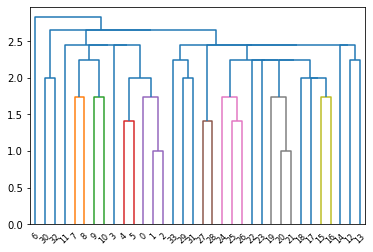

In [ ]:
dendrogram(hca);

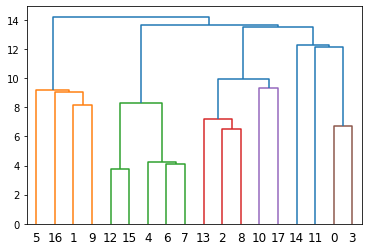

In [ ]:
dendrogram(hca_hr);

In [ ]:
df['cluster']=fcluster(hca,2,criterion='maxclust')

In [ ]:
hr['cluster']=fcluster(hca_hr,2,criterion='maxclust')

In [ ]:
df.groupby('cluster').mean()

,numb.obs,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
cluster,,,,,,,,,
1,17.818182,0.606061,0.484848,0.212121,0.181818,0.484848,0.333333,0.30303,0.272727
2,7.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000


In [ ]:
hr.groupby('cluster').mean()

,NR,NAME,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
cluster,,,,,,,,,,,,
1,8.750000,9.000000,10.000000,10.000000,4.250000,10.000000,4.750000,4.500000,3.750000,4.250000,4.250000,4.250000
2,9.714286,7.785714,6.071429,6.142857,7.571429,5.857143,7.928571,7.857143,7.785714,7.785714,7.785714,8.071429


In [ ]:
df.groupby('cluster').size()

cluster
1    33
2     1
dtype: int64

In [ ]:
hr.groupby('cluster').size()

cluster
1     4
2    14
dtype: int64

In [ ]:
kmeans=KMeans()

In [ ]:
kmeans.fit(df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans()

In [ ]:
kmeans.labels_

array([6, 6, 6, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 4, 4, 4, 4, 4,
       0, 0, 0, 0, 7, 7, 7, 3, 3, 3, 3, 3], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[2.45000000e+01, 2.50000000e-01, 1.00000000e+00, 2.50000000e-01,
        7.50000000e-01, 2.50000000e-01, 0.00000000e+00, 5.00000000e-01,
        0.00000000e+00],
       [5.50000000e+00, 5.00000000e-01, 5.00000000e-01, 2.50000000e-01,
        5.00000000e-01, 5.00000000e-01, 2.50000000e-01, 5.00000000e-01,
        0.00000000e+00],
       [1.55000000e+01, 2.50000000e-01, 5.00000000e-01, 2.50000000e-01,
        0.00000000e+00, 2.50000000e-01, 7.50000000e-01, 2.50000000e-01,
        0.00000000e+00],
       [3.20000000e+01, 4.00000000e-01, 6.00000000e-01, 6.00000000e-01,
        2.00000000e-01, 4.00000000e-01, 0.00000000e+00, 6.00000000e-01,
        4.00000000e-01],
       [2.00000000e+01, 1.00000000e+00, 4.00000000e-01, 2.00000000e-01,
        0.00000000e+00, 8.00000000e-01, 0.00000000e+00, 0.00000000e+00,
        2.00000000e-01],
       [1.05000000e+01, 6.66666667e-01, 5.00000000e-01, 1.66666667e-01,
        1.66666667e-01, 5.00000000e-01, 6.66666667e-01, 3.33333333e-01,
        6.6

In [ ]:
new=[[1, 1, 1, 1, 1, 1, 1, 1,1], [0, 0, 0, 0, 0, 0, 0, 0,0]]

In [ ]:
kmeans.predict(new)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([6, 6], dtype=int32)

In [ ]:
df['cluster2']=kmeans.labels_

In [ ]:
df.groupby('cluster2').mean()

,numb.obs,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
cluster2,,,,,,,,,
0,24.5,0.250000,1.000000,0.250000,0.750000,0.25,0.000000,0.500000,0.000000
1,5.5,0.500000,0.500000,0.250000,0.500000,0.50,0.250000,0.500000,0.000000
2,15.5,0.250000,0.500000,0.250000,0.000000,0.25,0.750000,0.250000,0.000000
3,32.0,0.400000,0.600000,0.600000,0.200000,0.40,0.000000,0.600000,0.400000
4,20.0,1.000000,0.400000,0.200000,0.000000,0.80,0.000000,0.000000,0.200000
5,10.5,0.666667,0.500000,0.166667,0.166667,0.50,0.666667,0.333333,0.666667
6,2.0,1.000000,0.000000,0.000000,0.000000,1.00,0.333333,0.000000,0.333333
7,28.0,0.666667,0.333333,0.000000,0.000000,0.00,0.666667,0.333333,0.333333


In [ ]:
df.groupby('cluster2').size()

cluster2
0    4
1    4
2    4
3    5
4    5
5    6
6    3
7    3
dtype: int64